In [1]:
%pylab inline
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

Populating the interactive namespace from numpy and matplotlib


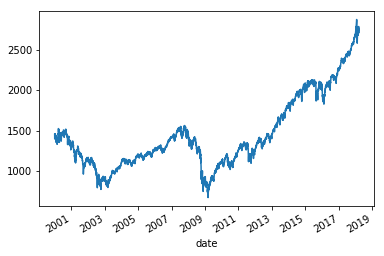

In [2]:
ts = TimeSeries(key="RL0YBD0NPUE3QYQ6", output_format="pandas")
sp500, _ = ts.get_daily("SPX", outputsize="full")
sp500.index = pd.to_datetime(sp500.index)
col_mapping = {
    "5. volume": "Volume",
    "4. close": "Close",
    "2. high": "High",
    "1. open": "Open",
    "3. low": "Low"
}
sp500.rename(col_mapping, axis="columns", inplace=True)
sp500.head()

sp500.Close.plot()
plt.show()